# Example 1: How to read dicom files, untiltening and registering
The files can be download from the github repository. It contain data from a dry and wet scan taken from a sample core.



In [1]:
# Import scripts to use 
import readers_preprocessing as rp # Reading and preprocessing functions
import plot_scans  as ps # Plotting functions

In [2]:
# Declare the files path as a string variables
dry_path = 'C:/Users/ubillusj/Desktop/ct_scanner_/Almostafa/N2_dry/Raw/'
wet_path = 'C:/Users/ubillusj/Desktop/ct_scanner_/Almostafa/100%_brine/Raw_wet/'

Read the dicom files using `rp.read_dicom(path)`

In [3]:
dry = rp.read_dicom(dry_path) # Read the dry scans
wet = rp.read_dicom(wet_path) # Read the wet scans

Plot the scans to check if it is required to run untilting and registering functions

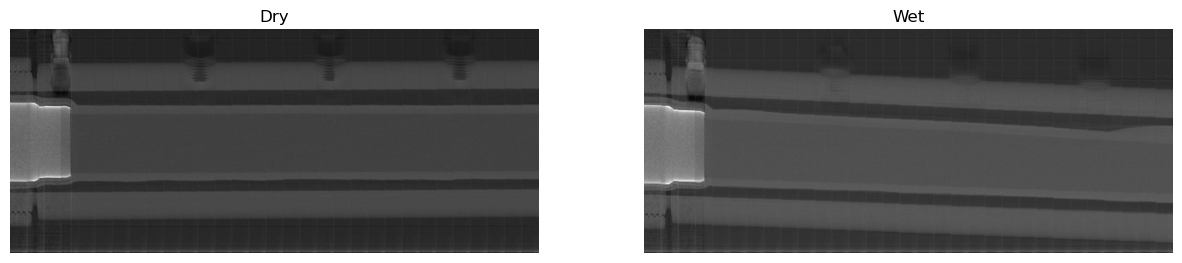

In [4]:
sdict = {'Dry':dry, 'Wet':wet} # Create a dictionary to store the scans
ps.compare_scans(sdict=sdict) # Plot the scans

As we observed in the scans, these are tilted and might need some registration. Let's apply both routines to the samples

You can easily obtain the core centroid using ImageJ tool or use a function to detect circles within the scans (this function is not currently available)

In [5]:
# Center coordinates are given in mm. You can obtain this value by multiplying ImageJ coordinates by 4
dryc = rp.center_itk(dry,262,241,259,241) # Center the dry scans
wetc = rp.center_itk(wet,273,274,320,292) # Center the wet scans

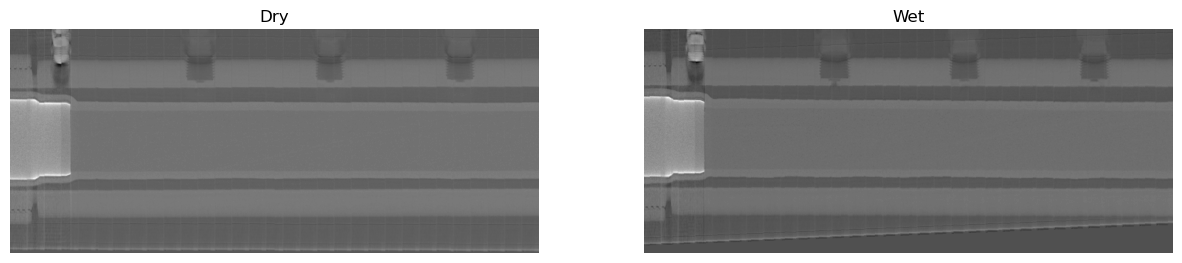

In [6]:
sdictc = {'Dry':dryc, 'Wet':wetc} # Create a dictionary to store the centered scans
ps.compare_scans(sdict=sdictc) # Plot the centered scans

After we have untiltened the core sample, it is recommend for this type of problem where you are sure that the core was moved during the experiments, to register the wet sample to the dry sample using `rp.volume_registration`. Which we are going to assume it is our fixed sample 

In [7]:
# Register the dry scans to the wet scans
wetreg = rp.volume_registration(dryc,wetc)

The fuction above use feature matching to perform volume registration, in all datasets available currently seems to do a great job but it can differ from sample to sample

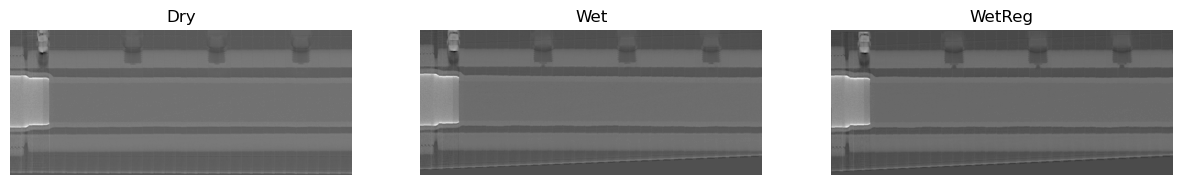

In [8]:
sdictr = {'Dry':dryc, 'Wet':wetc, 'WetReg':wetreg} # Create a dictionary to store the registered scans
ps.compare_scans(sdict=sdictr) # Plot the registered scans